# Lab 12 - Unsupervised learning
- **Author:** Dimitris Papadimitriou ([dimitri@berkeley.edu](mailto:dimitri@berkeley.edu))
- **Date:** 4/21/2020
- **Course:** INFO 251: Applied machine learning

### Topics:
1. K-Means clustering
2. Dimensionality reduction: PCA

### References: 
* [In Depth: k-Means Clustering - Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)
* [Principal Component Analysis](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

## Part 1: k-Means clustering

Two assumptions of the k-means mode
- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers. 

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import IPython
import numpy as np

300 data points with 2 features


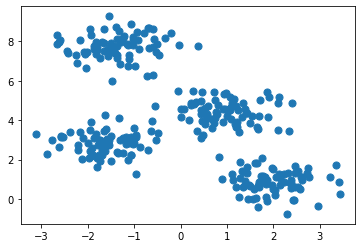

In [10]:
from sklearn.datasets.samples_generator import make_blobs
# Generate isotropic Gaussian blobs for clustering.
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
X, y_true = make_blobs(n_samples=300, n_features=2, centers=4, 
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)
print('{} data points with {} features'.format(X.shape[0],X.shape[1]))

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=19)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(kmeans.inertia_)

57.14252867426996


In [12]:
y_kmeans

array([ 6,  4,  1,  9,  6, 15, 11,  1,  9,  9,  3,  2,  1,  2,  0,  7,  1,
        8, 10, 11,  5,  6, 12,  3,  3, 12,  8, 12,  3,  7,  9,  2, 17, 16,
        4,  2,  2,  2,  3,  0,  7, 11, 12, 17, 11, 10, 14, 10,  4,  6,  3,
        8,  9,  0,  6, 10,  9, 11,  4,  6,  2,  7, 14, 10,  3, 10,  2,  8,
        2, 10,  1, 10,  9, 10, 11,  9,  3,  1,  8,  9,  0,  7,  6,  6, 14,
       12,  8, 12, 16,  4,  7,  8, 14,  3, 10, 17,  6,  5, 12,  3,  9,  0,
        9,  8,  1,  8, 15,  1, 16, 12, 11, 13,  0,  2,  8, 17,  4,  6,  6,
       12, 10,  0, 13,  0,  6,  8,  0, 11,  6, 11,  9, 11, 11, 15,  4, 11,
        3,  2,  7,  9,  2, 10, 17, 13, 18, 11,  4,  7,  4,  4,  4,  1, 16,
       12,  0, 10,  9, 11,  8,  1, 14,  7,  7,  6,  1,  3, 11, 12,  6, 17,
        1, 14,  0, 18, 13,  4,  5,  8,  7, 10,  5, 17,  3, 10, 12,  1,  1,
        1,  5,  4,  7, 10,  1,  7, 11, 11,  3, 17, 11,  4, 17, 10,  0, 11,
       17, 16, 10,  9,  1, 16,  1, 11, 12, 18,  4, 10, 10,  0, 15,  7,  4,
        8,  0,  3,  0,  3

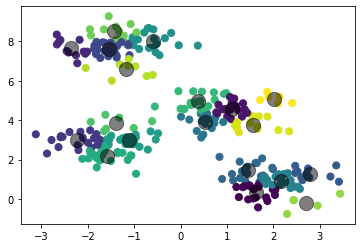

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Elbow rule

* How can we avoid overfitting?

In [14]:
n_clusters = np.arange(1, 40)
sse = []
for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)


Text(0, 0.5, 'SSE')

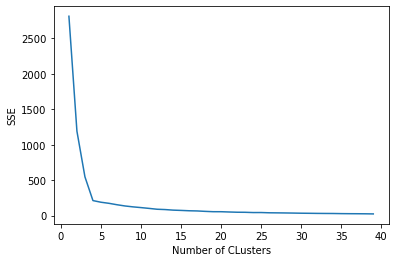

In [15]:
plt.plot(n_clusters, sse)
plt.xlabel('Number of CLusters')
plt.ylabel('SSE')

In [16]:
from sklearn.metrics import pairwise_distances_argmin
pairwise_distances_argmin(X, X[:4])

array([0, 1, 2, 3, 0, 0, 0, 2, 3, 3, 0, 1, 2, 1, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 2, 0, 2, 3, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2,
       0, 0, 3, 0, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 1, 0, 1, 2, 3, 0, 0, 0,
       1, 0, 1, 0, 2, 0, 3, 0, 0, 3, 0, 2, 0, 3, 0, 2, 0, 0, 3, 2, 0, 2,
       1, 1, 2, 0, 3, 0, 0, 2, 0, 0, 2, 0, 3, 0, 3, 0, 2, 0, 0, 2, 1, 2,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 1, 0, 0, 1, 0, 3, 1, 0, 0, 2, 2, 0, 1, 2, 1, 1, 3, 2, 1, 2,
       0, 0, 3, 0, 0, 2, 1, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 3, 0, 2, 2, 3,
       0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2,
       0, 1, 2, 0, 0, 0, 2, 1, 0, 3, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 3, 3, 2, 2, 3, 2, 0, 0, 2, 0, 0, 3, 0, 0, 2,
       0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 3, 2, 2, 0, 0,
       3, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 1, 0, 0, 2, 0, 0, 0,
       1, 0, 3, 2, 0, 0, 1, 3, 3, 0, 0, 2, 3, 0], d

## Part 3: Principal Component Analysis

Just when you thought you were *finally* done with the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing), it has come back to haunt you for a few more minutes.  Make sure you're up and running as you were on the previous problem set:

In [17]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import scipy as sp

In [23]:
bdata = load_boston()
boston = pd.DataFrame(bdata.data)
boston.columns = bdata.feature_names[:]
boston['MEDV'] = bdata.target

Run principal component analysis using [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) from sklearn to find the first 12 principal components of your data.  Use only your training set (66% of the data), and use all features *except* the median housing price.  Create a figure showing how the amount of variance explained by your components increases as you increase the number of components from 1 to 5.

In [24]:
from sklearn.model_selection import train_test_split
v = bdata.feature_names[:]
X_train, X_test, y_train, y_test = train_test_split(boston[v], boston['MEDV'], test_size=0.3, random_state=4973)
print("Initial dimension of data is {}".format(X_train.shape[1]))

Initial dimension of data is 13


In [29]:
from sklearn import decomposition
from sklearn import preprocessing
#scaler = preprocessing.StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
X_train = X_train[['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
X_test = X_test[['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
pca = decomposition.PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train)
print("The amount of variance explained by the projected data is {}%".format(np.sum(pca.explained_variance_ratio_)))
print("Dimension of original data {}".format(X_train.shape))
print("Dimension of projected data reprentation {}".format(pca.fit_transform(X_train).shape))


The amount of variance explained by the projected data is 0.9971494655688538%
Dimension of original data (354, 10)
Dimension of projected data reprentation (354, 3)


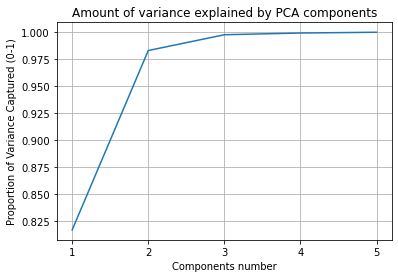

In [30]:
comp_n = 5
pca = PCA(n_components = comp_n)
pca.fit(X_train)
vari = pca.explained_variance_ratio_
    
fig = plt.figure()
ax = plt.subplot(111)
plt.plot(range(1, comp_n+1), np.cumsum(vari))

plt.xlabel('Components number')
plt.ylabel('Proportion of Variance Captured (0-1)')
plt.title('Amount of variance explained by PCA components')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.xticks(range(1, 6), [str(x) for x in range(1, 6)])
plt.grid()

### Regression and PCA

Using just the first Principal Component learned on the training data, project all of your data (including the test data) onto this 1-dimensional subspace using the `fit_transform` function.  Now, using your training data, fit a regression of median housing price on this first principal component of your data.  Report the RMSE of this regression for both the training and test set.

In [25]:
pca = PCA(n_components = 1)
pca.fit(X_train)
X_train['pca1'] = pca.transform(X_train)
X_test['pca1'] = pca.transform(X_test)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
def compute_rmse(predictions, yvalues):
    predictions = np.array(predictions)
    yvalues = np.array(yvalues)
    return np.sqrt(np.mean(np.square(predictions- yvalues)))

In [28]:
model = LinearRegression()
model = model.fit(X_train[['pca1']], y_train)
y_train_predict = model.predict(X_train[['pca1']])
y_test_predict = model.predict(X_test[['pca1']])
print(compute_rmse(y_train_predict, y_train))
print(compute_rmse(y_test_predict, y_test))

7.67037067109275
8.823016703712028


In [42]:
# Original regression
model = LinearRegression()
model = model.fit(X_train[['NOX'   ,  'RM' ,   'AGE']], y_train)
y_train_predict = model.predict(X_train[[  'NOX'   ,  'RM' ,   'AGE']])
y_test_predict = model.predict(X_test[[  'NOX'   ,  'RM' ,   'AGE']])
print(compute_rmse(y_train_predict, y_train))
print(compute_rmse(y_test_predict, y_test))

6.089892612089259
6.552043855482429


### Digits recognition

In [30]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape


(1797, 64)

<Figure size 432x288 with 0 Axes>

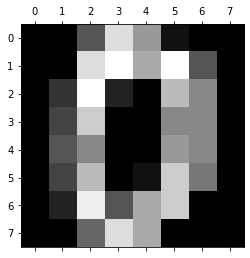

0


In [35]:
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 
print(digits.target[0])

In [36]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


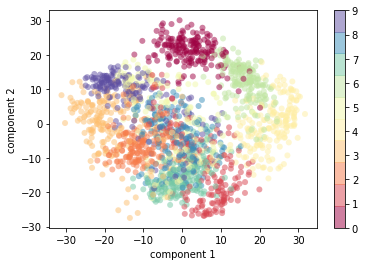

In [38]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()